We are to train a network using data communities datasets , the network structure should evaluate different loss functions on the data sets , evaluate different optimizer s, and to evaluate different regularization measure on the performance of the classifier on test data. 

# New Section

In [ ]:
from keras import layers
from tensorflow.keras.layers import BatchNormalization
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.models import Sequential
from keras import optimizers
from keras import losses
import keras.utils as np_utils

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
def load_crime_data(df):
    dt = pd.read_csv(df,delim_whitespace = False,header=None)
    dt = dt.replace("?",np.NAN)
    dt = dt.values
    train_data = dt[:1500,5:127].astype("float")
    test_data = dt[1500:,5:127].astype("float")
    train_labels = dt[:1500,127:128].astype("float")
    test_labels = dt[1500:,127:128].astype("float")
    return (train_data,train_labels),(test_data,test_labels)

def load_iris_data(df):
    dt = pd.read_csv(df,delim_whitespace = False,header=None)
    dt = dt.replace("?",np.NAN)
    dt = dt.sample(frac=1)
    dt = dt.values
    train_data = dt[:100,:4].astype("float")
    test_data = dt[100:,:4].astype("float")
    train_labels = np_utils.to_categorical(dt[:100,3])
    test_labels = np_utils.to_categorical(dt[100:,3])
    return (train_data,train_labels),(test_data,test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.0081
Test Results:sgd-mse: [0.028784161433577538, 0.008097166195511818]
16/16 [==============================] - 0s 3ms/step - loss: 0.1103 - accuracy: 0.0101
Test Results:sgd-mae: [0.1103285476565361, 0.010121457278728485]
16/16 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 0.0121
Test Results:sgd-logcosh: [0.011160094290971756, 0.012145749293267727]
16/16 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 0.0121
Test Results:rms-mse: [0.01949957013130188, 0.012145749293267727]
16/16 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.0121
Test Results:rms-mae: [0.09595213830471039, 0.012145749293267727]
16/16 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.0121
Test Results:rms-logcosh: [0.009167946875095367, 0.012145749293267727]
16/16 [==============================] - 0s 2ms/step - loss: 0.0184 - ac

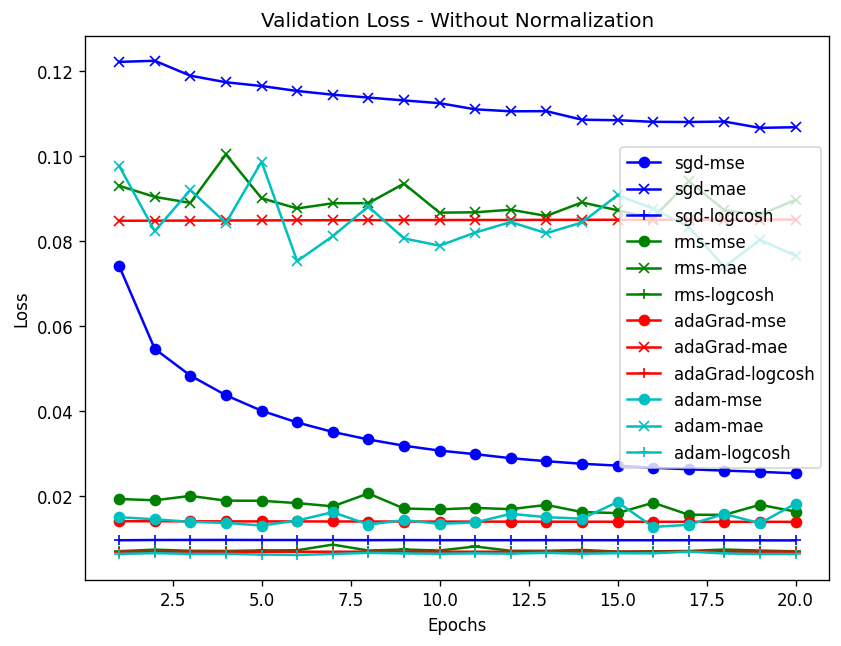

In [ ]:
(train_data,train_labels),(test_data,test_labels) = load_crime_data("https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data")
imp = SimpleImputer(missing_values=np.NAN, strategy='mean')
train_data = imp.fit_transform(train_data)
test_data = imp.fit_transform(test_data)
train_labels = imp.fit_transform(train_labels)
test_labels = imp.fit_transform(test_labels)

ep = 20
inputShape = (train_data.shape[1],)

sgd = optimizers.SGD(learning_rate=0.0001,decay = 1e-6,momentum=0.9,nesterov=True)
rms = optimizers.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=None, decay=0.0)
adaGrad = optimizers.Adadelta(learning_rate=0.0001, rho=0.95, epsilon=None, decay=0.0)
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

mse = losses.mean_squared_error
mae = losses.mean_absolute_error
logcosh = losses.logcosh

model = Sequential()
model.add(layers.Dense(64,input_shape=(train_data.shape[1],)))
model.add(Activation('relu'))

model.add(layers.Dense(32))
model.add(Activation('relu'))

model.add(layers.Dense(1))

plt.figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
params = {'optimizer':[sgd,rms,adaGrad,adam],'losses':[mse,mae,logcosh]}

labels_losses = ['mse','mae','logcosh']
labels_optimizers = ['sgd','rms','adaGrad','adam']
colors = {0: 'b',1: 'g',2: 'r',3: 'c'}
markers = {0: 'o', 1: 'x',2: '+'}
for i, opt_param in enumerate(params['optimizer']):
    for j, opt_loss in enumerate(params['losses']):
        model.compile(loss = opt_loss,optimizer=opt_param,metrics=['accuracy'])

        result = model.fit(train_data, train_labels,epochs=ep,batch_size=32,validation_split=0.1,verbose=0)

        val_loss_values = result.history['val_loss']
        epochs = range(1,len(val_loss_values)+1)
        plt.plot(epochs,val_loss_values,color=colors[i],marker=markers[j],label =  labels_optimizers[i]+ '-' +labels_losses[j])
        
        print("Test Results:{}-{}: {}".format(labels_optimizers[i],labels_losses[j],model.evaluate(test_data,test_labels)))

tittle_main = 'Validation Loss - Without Normalization'
plt.title(tittle_main)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('regression_without_normalization.png')
plt.show()

16/16 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.0020
Test Results:sgd-mse: [0.05444446578621864, 0.0020242915488779545]
16/16 [==============================] - 0s 2ms/step - loss: 0.1314 - accuracy: 0.0020
Test Results:sgd-mae: [0.13137292861938477, 0.0020242915488779545]
16/16 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 0.0020
Test Results:sgd-logcosh: [0.01714423857629299, 0.0020242915488779545]
16/16 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.0121
Test Results:rms-mse: [0.02157161571085453, 0.012145749293267727]
16/16 [==============================] - 0s 2ms/step - loss: 0.0964 - accuracy: 0.0121
Test Results:rms-mae: [0.09638435393571854, 0.012145749293267727]
16/16 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 0.0121
Test Results:rms-logcosh: [0.00894256867468357, 0.012145749293267727]
16/16 [==============================] - 0s 2ms/step - loss: 0.0183 - a

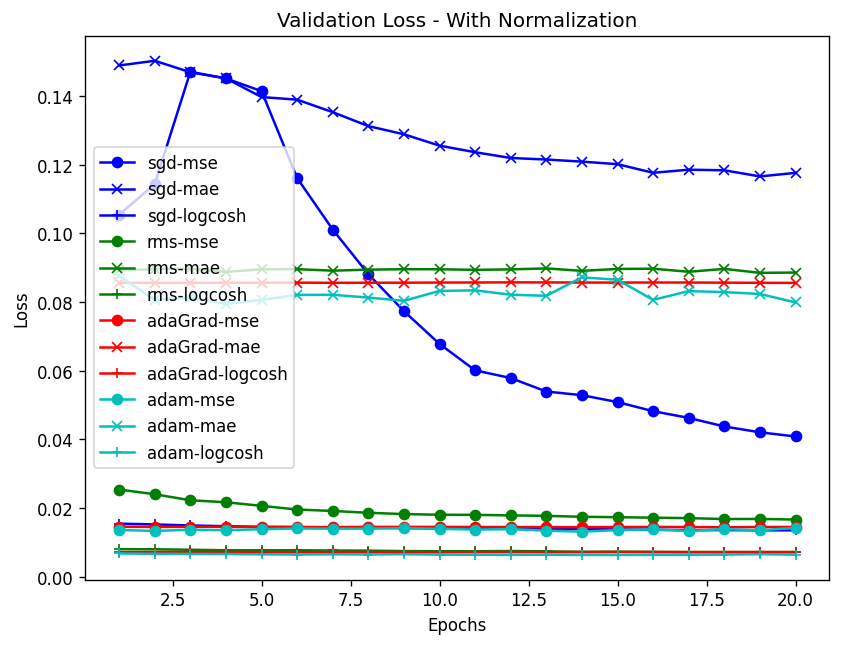

In [ ]:

(train_data,train_labels),(test_data,test_labels) = load_crime_data("https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data")
imp = SimpleImputer(missing_values=np.NAN, strategy='mean')
train_data = imp.fit_transform(train_data)
test_data = imp.fit_transform(test_data)
train_labels = imp.fit_transform(train_labels)
test_labels = imp.fit_transform(test_labels)

ep = 20
inputShape = (train_data.shape[1],)

sgd = optimizers.SGD(learning_rate=0.0001,decay = 1e-6,momentum=0.9,nesterov=True)
rms = optimizers.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=None, decay=0.0)
adaGrad = optimizers.Adadelta(learning_rate=0.0001, rho=0.95, epsilon=None, decay=0.0)
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

mse = losses.mean_squared_error
mae = losses.mean_absolute_error
logcosh = losses.logcosh

model = Sequential()
model.add(layers.Dense(64,input_shape=(train_data.shape[1],)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(layers.Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(layers.Dense(1))

plt.figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
params = {'optimizer':[sgd,rms,adaGrad,adam],'losses':[mse,mae,logcosh]}

labels_losses = ['mse','mae','logcosh']
labels_optimizers = ['sgd','rms','adaGrad','adam']
colors = {0: 'b',1: 'g',2: 'r',3: 'c'}
markers = {0: 'o', 1: 'x',2: '+'}
for i, opt_param in enumerate(params['optimizer']):
    for j, opt_loss in enumerate(params['losses']):
        model.compile(loss = opt_loss,optimizer=opt_param,metrics=['accuracy'])

        result = model.fit(train_data, train_labels,epochs=ep,batch_size=32,validation_split=0.1,verbose=0)

        val_loss_values = result.history['val_loss']
        epochs = range(1,len(val_loss_values)+1)
        plt.plot(epochs,val_loss_values,color=colors[i],marker=markers[j],label =  labels_optimizers[i]+ '-' +labels_losses[j])
        
        print("Test Results:{}-{}: {}".format(labels_optimizers[i],labels_losses[j],model.evaluate(test_data,test_labels)))

tittle_main = 'Validation Loss - With Normalization'
plt.title(tittle_main)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('regression_with_normalization.png')
plt.show()

2/2 [==============================] - 0s 7ms/step - loss: 0.9274 - accuracy: 0.7600
Test Results:sgd-cc: [0.9273554086685181, 0.7599999904632568]
2/2 [==============================] - 0s 7ms/step - loss: 0.8433 - accuracy: 0.7600
Test Results:sgd-ch: [0.8433492183685303, 0.7599999904632568]
2/2 [==============================] - 0s 7ms/step - loss: 0.7565 - accuracy: 0.7600
Test Results:sgd-kl: [0.7565360069274902, 0.7599999904632568]
2/2 [==============================] - 0s 8ms/step - loss: 0.6509 - accuracy: 0.7600
Test Results:rms-cc: [0.6508541107177734, 0.7599999904632568]
2/2 [==============================] - 0s 5ms/step - loss: 0.6683 - accuracy: 0.7600
Test Results:rms-ch: [0.6683042645454407, 0.7599999904632568]
2/2 [==============================] - 0s 7ms/step - loss: 0.5685 - accuracy: 0.7600
Test Results:rms-kl: [0.5685499906539917, 0.7599999904632568]
2/2 [==============================] - 0s 8ms/step - loss: 0.5684 - accuracy: 0.7600
Test Results:adaGrad-cc: [0.56838

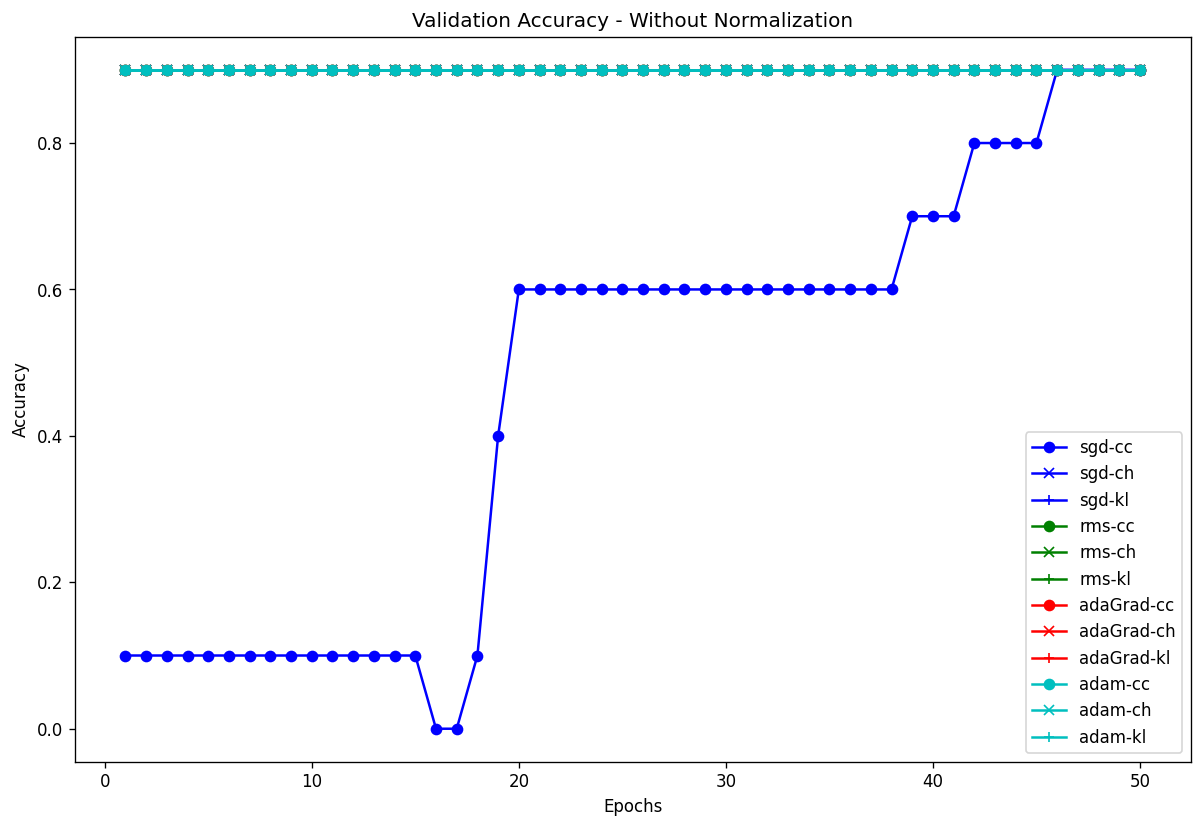

Best validation acc of epoch: 0.8999999761581421


In [ ]:
(x_train,y_train),(x_test,y_test) = load_iris_data("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

ep = 50
inputShape = (x_train.shape[1],)
sgd = optimizers.SGD(learning_rate=0.0001,decay = 1e-6,momentum=0.9,nesterov=True)
rms = optimizers.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=None, decay=0.0)
adaGrad = optimizers.Adadelta(learning_rate=0.0001, rho=0.95, epsilon=None, decay=0.0)
adam = optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model = Sequential()
model.add(layers.Dense(32,input_shape=inputShape))
model.add(Activation('relu'))

model.add(layers.Dense(16))
model.add(Activation('relu'))

model.add(layers.Dense(3))
model.add(Activation('softmax'))

modelList = []
plt.figure(num=None, figsize=(12, 8), dpi=120, facecolor='w', edgecolor='k')
params = {
    'optimizer':[sgd,rms,adaGrad,adam],
    'losses':['categorical_crossentropy','categorical_hinge','kullback_leibler_divergence'],
    'regularization':[ ]}
labels_losses = ['cc','ch','kl']
labels_optimizers = ['sgd','rms','adaGrad','adam']
colors = {0: 'b',1: 'g',2: 'r',3: 'c'}
markers = {0: 'o', 1: 'x',2: '+'}
for i, opt_param in enumerate(params['optimizer']):
    for j, opt_loss in enumerate(params['losses']):
        model.compile(loss = opt_loss,optimizer=opt_param,metrics=['accuracy'])

        result = model.fit(x_train, y_train,epochs=ep,batch_size=32,validation_split=0.1,verbose=False)

        modelList.append(model)

        val_accuracy_values = result.history['val_accuracy']
        epochs = range(1,len(val_accuracy_values)+1)
        
        plt.plot(epochs,val_accuracy_values,color=colors[i],marker=markers[j],label =  labels_optimizers[i]+ '-' +labels_losses[j])
        
        print("Test Results:{}-{}: {}".format(labels_optimizers[i],labels_losses[j],model.evaluate(x_test,y_test)))

tittle_main = 'Validation Accuracy - Without Normalization'
plt.title(tittle_main)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('classification_without_normalization.png')
plt.show()
    
val_accuracy = np.amax(result.history['val_accuracy'])
print('Best validation acc of epoch:', val_accuracy)

In [ ]:
# Ensemble Classification
y_predicted =  np.array([model.predict(x_test) for model in modelList])
summed = np.sum(y_predicted,axis=0)
result = np.argmax(summed,axis=1)
print("Ensemble Classification Accuracy: {}".format(accuracy_score(np.argmax(y_test,axis=1),result)))

2/2 [==============================] - 0s 4ms/step
Ensemble Classification Accuracy: 0.76


2/2 [==============================] - 0s 12ms/step - loss: 0.9717 - accuracy: 0.4200
Test Results:sgd-cc: [0.9716610908508301, 0.41999998688697815]
2/2 [==============================] - 0s 5ms/step - loss: 0.8442 - accuracy: 0.8200
Test Results:sgd-ch: [0.8441619873046875, 0.8199999928474426]
2/2 [==============================] - 0s 7ms/step - loss: 0.6249 - accuracy: 0.9400
Test Results:sgd-kl: [0.6248834729194641, 0.9399999976158142]
2/2 [==============================] - 0s 7ms/step - loss: 0.5458 - accuracy: 0.9400
Test Results:rms-cc: [0.5458093881607056, 0.9399999976158142]
2/2 [==============================] - 0s 8ms/step - loss: 0.6292 - accuracy: 0.9400
Test Results:rms-ch: [0.6292087435722351, 0.9399999976158142]
2/2 [==============================] - 0s 7ms/step - loss: 0.4834 - accuracy: 0.9400
Test Results:rms-kl: [0.48338156938552856, 0.9399999976158142]
2/2 [==============================] - 0s 15ms/step - loss: 0.5049 - accuracy: 0.9400
Test Results:adaGrad-cc: [0.5

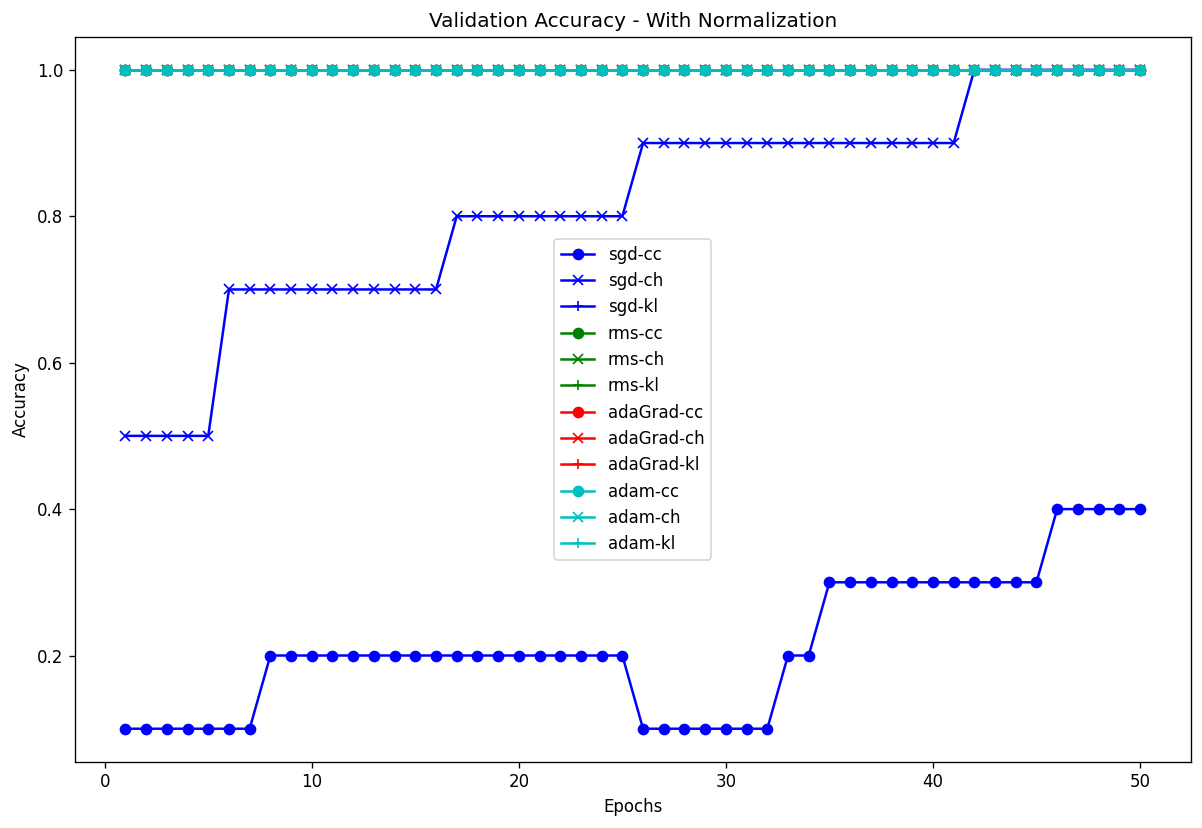

In [ ]:
(x_train,y_train),(x_test,y_test) = load_iris_data("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

ep = 50
inputShape = (x_train.shape[1],)
sgd = optimizers.SGD(learning_rate=0.0001,decay = 1e-6,momentum=0.9,nesterov=True)
rms = optimizers.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=None, decay=0.0)
adaGrad = optimizers.Adadelta(learning_rate=0.0001, rho=0.95, epsilon=None, decay=0.0)
adam = optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model = Sequential()
model.add(layers.Dense(32,input_shape=inputShape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(layers.Dense(16))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(layers.Dense(3))
model.add(BatchNormalization())
model.add(Activation('softmax'))

plt.figure(num=None, figsize=(12, 8), dpi=120, facecolor='w', edgecolor='k')
params = {
    'optimizer':[sgd,rms,adaGrad,adam],
    'losses':['categorical_crossentropy','categorical_hinge','kullback_leibler_divergence'],
    'regularization':[ ]}
labels_losses = ['cc','ch','kl']
labels_optimizers = ['sgd','rms','adaGrad','adam']
colors = {0: 'b',1: 'g',2: 'r',3: 'c'}
markers = {0: 'o', 1: 'x',2: '+'}
for i, opt_param in enumerate(params['optimizer']):
    for j, opt_loss in enumerate(params['losses']):
        
        model.compile(loss = opt_loss,optimizer=opt_param,metrics=['accuracy'])

        result = model.fit(x_train, y_train,epochs=ep,batch_size=32,validation_split=0.1,verbose=False)

        val_accuracy_values = result.history['val_accuracy']
        epochs = range(1,len(val_accuracy_values)+1)
        
        plt.plot(epochs,val_accuracy_values,color=colors[i],marker=markers[j],label =  labels_optimizers[i]+ '-' +labels_losses[j])
        
        print("Test Results:{}-{}: {}".format(labels_optimizers[i],labels_losses[j],model.evaluate(x_test,y_test)))

tittle_main = 'Validation Accuracy - With Normalization'
plt.title(tittle_main)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('classification_with_normalization.png')
plt.show()


In [ ]:
pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bayes_opt import BayesianOptimization

# Let's start by defining our function, bounds, and instanciating an optimization object.
def black_box_function(x, y):
    return -x ** 2 - (y - 1) ** 2 + 1

In [ ]:
optimizer = BayesianOptimization(
    f=None,
    pbounds={'x': (-2, 2), 'y': (-3, 3)},
    verbose=2,
    random_state=1,
)


In [ ]:
from bayes_opt import UtilityFunction

utility = UtilityFunction(kind="ucb", kappa=2.5, xi=0.0)

  

In [ ]:
next_point_to_probe = optimizer.suggest(utility)
print("Next point to probe is:", next_point_to_probe)

Next point to probe is: {'x': -0.331911981189704, 'y': 1.3219469606529488}


In [ ]:
target = black_box_function(**next_point_to_probe)
print("Found the target value to be:", target)

Found the target value to be: 0.7861845912690542


In [ ]:
optimizer.register(
    params=next_point_to_probe,
    target=target,
)

The maximize loop
And that's it. By repeating the steps above you recreate the internals of the maximize method. This should give you all the flexibility you need to log progress, hault execution, perform concurrent evaluations, etc.

In [ ]:
for _ in range(5):
    next_point = optimizer.suggest(utility)
    target = black_box_function(**next_point)
    optimizer.register(params=next_point, target=target)
    
    print(target, next_point)
print(optimizer.max)

-18.49187152919165 {'x': 1.8861546000771092, 'y': -2.9917780942581977}
0.7911494590443674 {'x': -0.31764604716962586, 'y': 1.3285597809731806}
-6.999999999999999 {'x': -1.9999999999999998, 'y': 3.0}
-7.0 {'x': 2.0, 'y': 3.0}
-7.503866814436659 {'x': -2.0, 'y': -1.1222315647536345}
{'target': 0.7911494590443674, 'params': {'x': -0.31764604716962586, 'y': 1.3285597809731806}}


In [ ]:
def func_with_discrete_params(x, y, d):
    # Simulate necessity of having d being discrete.
    assert type(d) == int
    
    return ((x + y + d) // (1 + d)) / (1 + (x + y) ** 2)

In [ ]:
def function_to_be_optimized(x, y, w):
    d = int(w)
    return func_with_discrete_params(x, y, d)


In [ ]:
optimizer = BayesianOptimization(
    f=function_to_be_optimized,
    pbounds={'x': (-10, 10), 'y': (-10, 10), 'w': (0, 5)},
    verbose=2,
    random_state=1,
)

In [ ]:
optimizer.maximize(alpha=1e-3)

|   iter    |  target   |     w     |     x     |     y     |
-------------------------------------------------------------
| 1         | -0.06199  | 2.085     | 4.406     | -9.998    |
| 2         | -0.0344   | 1.512     | -7.065    | -8.153    |
| 3         | -0.2177   | 0.9313    | -3.089    | -2.065    |
| 4         | 0.1865    | 2.694     | -1.616    | 3.704     |
| 5         | -0.2187   | 1.022     | 7.562     | -9.452    |
| 6         | 0.1868    | 2.533     | -1.728    | 3.815     |
| 7         | 0.05119   | 3.957     | -0.6151   | 6.785     |
| 8         | 0.1761    | 0.5799    | 1.181     | 4.054     |
| 9         | 0.04045   | 4.004     | 4.304     | 2.656     |
| 10        | 0.07509   | 0.0       | 4.843     | 7.759     |
| 11        | 0.3512    | 0.0       | -5.713    | 7.072     |
| 12        | -0.8068   | 0.0       | -9.09     | 8.6       |
| 13        | 0.3774    | 0.3974    | -4.19     | 6.264     |
| 14        | 0.157     | 0.0       | -3.587    | 8.534     |
| 15    

Tuning the underlying Gaussian Process
The bayesian optimization algorithm works by performing a gaussian process regression of the observed combination of parameters and their associated target values. The predicted parametertarget hyper-surface (and its uncertainty) is then used to guide the next best point to probe.

In [ ]:
optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds={'x': (-2, 2), 'y': (-3, 3)},
    verbose=2,
    random_state=1,
)
optimizer.maximize(
    init_points=1,
    n_iter=5,
    # What follows are GP regressor parameters
    alpha=1e-3,
    n_restarts_optimizer=5
)


|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 1         | 0.7862    | -0.3319   | 1.322     |
| 2         | -18.49    | 1.886     | -2.992    |
| 3         | 0.7911    | -0.3176   | 1.329     |
| 4         | -6.11     | -1.763    | 3.0       |
| 5         | -2.895    | 1.533     | 2.243     |
| 6         | -4.806    | -2.0      | -0.3439   |


In [ ]:
from bayes_opt.event import DEFAULT_EVENTS, Events
optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds={'x': (-2, 2), 'y': (-3, 3)},
    verbose=2,
    random_state=1,
)

In [ ]:
class BasicObserver:
    def update(self, event, instance):
        """Does whatever you want with the event and `BayesianOptimization` instance."""
        print("Event `{}` was observed".format(event))

In [ ]:
my_observer = BasicObserver()

optimizer.subscribe(
    event=Events.OPTIMIZATION_STEP,
    subscriber=my_observer,
    callback=None, # Will use the `update` method as callback
)

In [ ]:
def my_callback(event, instance):
    print("Conclusion")

optimizer.subscribe(
    event=Events.OPTIMIZATION_START,
    subscriber="Any hashable object",
    callback=my_callback,
)

In [ ]:
optimizer.maximize(init_points=1, n_iter=2)

Conclusion
Event `optimization:step` was observed
Event `optimization:step` was observed
Event `optimization:step` was observed
